# Salary Project

###### import the all needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

###### Read the salary csv file 

In [2]:
df=pd.read_csv('salary.csv')

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


To see the all column names

In [39]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

### About the Columns:

1.Rank

Here Rank column contain 'Prof','AsstProf' and 'AssocProf'.

2.discipline

Here discipline column contain 2 types 'A' and 'B' . Hence A are disciplined people and B are undisciplined people 

3.yrs.since.phd

Prof are take many years but AsstProf are less.

4.yrs.service

Number year service in teaching field.

5.Sex

sex column contain male and female

###### Checking Infomation of all columns like counting and Dtype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


###### Checking unique and value coounts of all columns

In [5]:
for val in df.columns[:-1]:
    print(df[val].unique())
    print(df[val].value_counts())
    print('---->---->---->---->---->---->----->----->------>')

['Prof' 'AsstProf' 'AssocProf']
Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
---->---->---->---->---->---->----->----->------>
['B' 'A']
B    216
A    181
Name: discipline, dtype: int64
---->---->---->---->---->---->----->----->------>
[19 20  4 45 40  6 30 21 18 12  7  1  2 38 37 39 31 36 34 24 13 35  5 11
 22 41  9 23 25 28 16 14 10  8  3 33 17 29 26 43 15 42 32 54 56 27 48 46
 47 52 51 49 44]
4     19
28    16
8     14
20    13
19    13
13    12
17    12
12    12
38    11
23    11
21    11
39    10
10    10
11    10
31    10
30     9
22     9
15     9
14     9
9      9
25     9
33     8
35     8
37     8
29     8
27     8
18     8
16     8
3      8
40     7
26     6
24     6
32     6
7      6
6      6
5      6
45     6
2      5
43     5
36     5
49     4
46     4
1      4
42     4
41     4
34     3
56     2
44     1
47     1
48     1
51     1
52     1
54     1
Name: yrs.since.phd, dtype: int64
---->---->---->---->---->---->----->----->------>
[18 16  3

###### changing Object column to integer

In [7]:
label=LabelEncoder()

In [8]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [9]:
list1=['rank', 'discipline','sex']

In [10]:
for column in list1:
    df[column]=label.fit_transform(df[column])

In [41]:
#After changing to see the dtypes
df.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object

In [11]:
#after changing to see the Dataset
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


After changing Object to Integer to see the all unique and count values of all columns

In [12]:
for val in df.columns[:-1]:
    print(df[val].unique())
    print(df[val].value_counts())
    print('---->---->---->--->--->---->----->')

[2 1 0]
2    266
1     67
0     64
Name: rank, dtype: int64
---->---->---->--->--->---->----->
[1 0]
1    216
0    181
Name: discipline, dtype: int64
---->---->---->--->--->---->----->
[19 20  4 45 40  6 30 21 18 12  7  1  2 38 37 39 31 36 34 24 13 35  5 11
 22 41  9 23 25 28 16 14 10  8  3 33 17 29 26 43 15 42 32 54 56 27 48 46
 47 52 51 49 44]
4     19
28    16
8     14
20    13
19    13
13    12
17    12
12    12
38    11
23    11
21    11
39    10
10    10
11    10
31    10
30     9
22     9
15     9
14     9
9      9
25     9
33     8
35     8
37     8
29     8
27     8
18     8
16     8
3      8
40     7
26     6
24     6
32     6
7      6
6      6
5      6
45     6
2      5
43     5
36     5
49     4
46     4
1      4
42     4
41     4
34     3
56     2
44     1
47     1
48     1
51     1
52     1
54     1
Name: yrs.since.phd, dtype: int64
---->---->---->--->--->---->----->
[18 16  3 39 41  6 23 45 20  8  2  1  0 34 36 26 31 30 19  4  9 21 27 38
 15 28 25 11  5 12 17 14 37  7 10

Describe the DataFrame it contain count,mean,std,min,max,25%,50%,75%.

In [14]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


###### Checking correlation with each other

In [42]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.095962,0.524310,0.446604,NaN,0.515398
discipline,-0.095962,1.000000,-0.233685,-0.185759,NaN,0.127542
yrs.since.phd,0.524310,-0.233685,1.000000,0.908046,NaN,0.386818
yrs.service,0.446604,-0.185759,0.908046,1.000000,NaN,0.284771
sex,NaN,NaN,NaN,NaN,NaN,NaN
salary,0.515398,0.127542,0.386818,0.284771,NaN,1.000000


Checking correlation with each other by using heatmap

<AxesSubplot:>

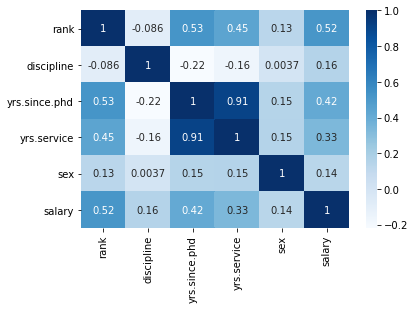

In [15]:
plt.figure()
sns.heatmap(df.corr(),annot=True,cmap='Blues')

checking null values in all columns

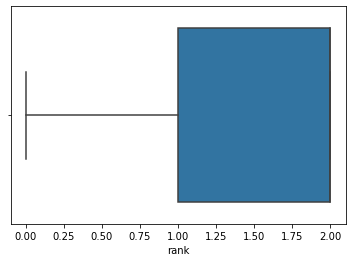

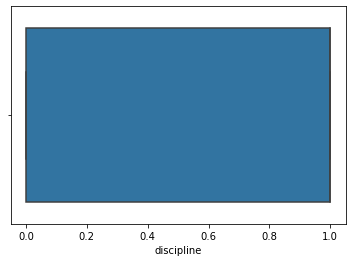

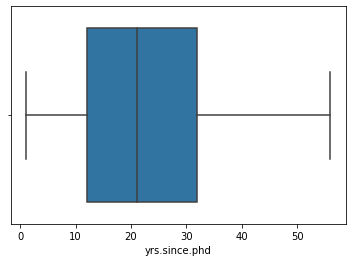

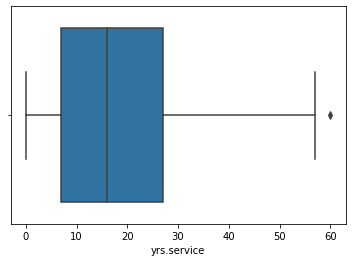

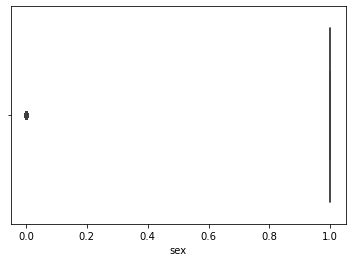

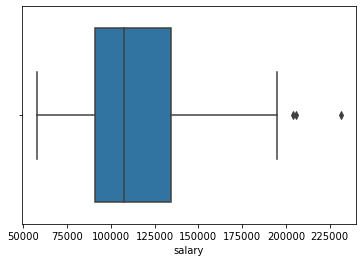

In [16]:
for val in df.columns:
    plt.figure()
    sns.boxplot(df[val])

### Remove Outliers

import zscore from scipy.stats

In [17]:
from scipy.stats import zscore

In [18]:
z=np.abs(zscore(df))

In [19]:
#checking row and column that outliers present
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


removing outliers and save as new DataFrame

In [20]:
df_new=df[(z<3).all(axis=1)]

In [21]:
#check the shape of new DataFrame
df_new.shape

(354, 6)

In [22]:
#checking the shape of old DataFrame
df.shape

(397, 6)

In [23]:
df=df_new

###### Separate the input columns

In [24]:
x=df.iloc[:,0:-1]

check the shape of x

In [43]:
x.shape

(354, 5)

###### Separate the output column

In [25]:
y=df.iloc[:,-1]

check the shape of y

In [27]:
y.shape

(354,)

###### Split x and y for Training and Testing

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

Check the shape of x_train

In [46]:
x_train.shape

(276, 5)

check the shape x_test

In [47]:
x_test.shape

(78, 5)

check the shape of y_train

In [48]:
y_train.shape

(276,)

check the shape of y_test

In [49]:
y_test.shape

(78,)

###### Fit the model by using x_train and y_train data. 

In [50]:
lnr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()

In [51]:
list2=[lnr,dtr,knr,svr]

###### fit the model and check the model score

In [52]:
for model in list2:
    model.fit(x_train,y_train)
    print(model)
    print(model.score(x_train,y_train))
    print('---->----->---->----->---->')

LinearRegression()
0.3632134939566495
---->----->---->----->---->
DecisionTreeRegressor()
0.9527192847778104
---->----->---->----->---->
KNeighborsRegressor()
0.5503937327258273
---->----->---->----->---->
SVR()
-0.05081217783390679
---->----->---->----->---->


###### Take the High score model and predict the x_test

In [53]:
pred=dtr.predict(x_test)

###### To see model predicted salaries and Actual salaries

In [54]:
print('Predicted values:-',pred)
print('Actual values:-',y_test)

Predicted values:- [ 82099.         135585.         134690.          83850.
  81077.66666667  81500.          75243.         148692.5
 100938.         121200.          70700.         136660.
 151575.          88709.         102914.          75243.
  75243.         108200.         175000.         115435.
  82099.         132000.         139750.         162200.
 100944.          81500.         135200.         129574.5
  79858.         139750.         101738.         151650.
  82099.         105000.         134778.         134550.
 100533.5        147310.5        129600.         109707.
 134885.         116518.          87800.          83850.
 114500.         103275.          82099.         186023.
 142023.          90259.5         98053.          92050.
  88175.         143940.          75044.          96545.
 121200.         119800.         118223.         126000.
 133217.          73928.          75243.         113543.
 105350.         112696.         102000.          68200.
  77700.  

Checking mean absolute error,mean squared error and r2 score for predicted salaries and Actual salaries

In [38]:
print(mean_absolute_error(pred,y_test))
print(mean_squared_error(pred,y_test))
print(r2_score(pred,y_test))

19598.383177570093
750051198.1858774
0.00011503754118935561


###### Import the joblib library to save the model

In [55]:
import joblib

save model by using dump

In [56]:
joblib.dump(dtr,'salary_dtr.obj')

['salary_dtr.obj']

If we load the model use 'load'.

In [57]:
load_model=joblib.load('salary_dtr.obj')

check that model is working or not

In [58]:
load_model.predict(x_test)

array([ 82099.        , 135585.        , 134690.        ,  83850.        ,
        81077.66666667,  81500.        ,  75243.        , 148692.5       ,
       100938.        , 121200.        ,  70700.        , 136660.        ,
       151575.        ,  88709.        , 102914.        ,  75243.        ,
        75243.        , 108200.        , 175000.        , 115435.        ,
        82099.        , 132000.        , 139750.        , 162200.        ,
       100944.        ,  81500.        , 135200.        , 129574.5       ,
        79858.        , 139750.        , 101738.        , 151650.        ,
        82099.        , 105000.        , 134778.        , 134550.        ,
       100533.5       , 147310.5       , 129600.        , 109707.        ,
       134885.        , 116518.        ,  87800.        ,  83850.        ,
       114500.        , 103275.        ,  82099.        , 186023.        ,
       142023.        ,  90259.5       ,  98053.        ,  92050.        ,
        88175.        , 1